Inicialmente é necessário importar os dos dados coletados e dividi-lo em conjuntos de teste e validação 

In [1]:
# Recebe os CSVs dos novos sinais gerados, divide em banco de dados de treino e teste, cria os bancos de dados
# de entradas e labels integrados e com todos os valores gerados para treinar a MLP  
import random
import pandas as pd
import numpy as np
import functools
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

lenght_signal = 850 # Precisa ser o mesmo número usado no programa "Desafio 2 - Gerador de Sinais"
tamanho_test = 0.2 # tamanho do conjunto de teste em porcentagem

#Parte 1 - Recepção dos dados e separação dos conjuntos de teste e validação de cada classe
# ENTRADA da Classe 0
dataset = pd.read_csv("Sinal do elevador correto.csv") 
dataset = dataset.drop(columns =['Unnamed: 0'])
train = dataset.drop(columns =[str(lenght_signal)]) 
label = dataset[[str(lenght_signal)]]
X_train0, X_test0, y_train0, y_test0 = train_test_split(train, label, test_size=tamanho_test) # separa 20% dos valores para validação.  A vantagem de separar os dados
                                                                                    # de validação por classe garante uma distribuição homogênea para treinamento
                                                                                    
# ENTRADA da Classe 1
dataset = pd.read_csv("Sinal do elevador falha_acel.csv")
dataset = dataset.drop(columns =['Unnamed: 0'])
train = dataset.drop(columns =[str(lenght_signal)]) 
label = dataset[[str(lenght_signal)]]
X_train1, X_test1, y_train1, y_test1 = train_test_split(train, label, test_size=tamanho_test) # separa 20% dos valores para validação 

# ENTRADA da Classe 2
dataset = pd.read_csv("Sinal do elevador falha_vel.csv") 
dataset = dataset.drop(columns =['Unnamed: 0'])
train = dataset.drop(columns =[str(lenght_signal)]) 
label = dataset[[str(lenght_signal)]]
X_train2, X_test2, y_train2, y_test2 = train_test_split(train, label, test_size=tamanho_test) # separa 20% dos valores para validação 

# ENTRADA da Classe 3
dataset = pd.read_csv("Sinal do elevador ruido_desl.csv")
dataset = dataset.drop(columns =['Unnamed: 0'])
train = dataset.drop(columns =[str(lenght_signal)]) 
label = dataset[[str(lenght_signal)]]
X_train3, X_test3, y_train3, y_test3 = train_test_split(train, label, test_size=tamanho_test) # separa 20% dos valores para validação 

# Junta todas as classes de entradas em um só banco de dados de treino
new_sheet = pd.concat([X_train0, X_train1, X_train2, X_train3], axis=0,sort=False) 
new_sheet_list = pd.concat([y_train0, y_train1, y_train2, y_train3], axis=0,sort=False)
new_sheet[lenght_signal] = new_sheet_list # coloca as labels na última coluna para embralhar no comando seguinte
new_sheet_shuffled = shuffle(new_sheet) # embaralha as entradas para deixar o treinamento da MLP otimizado com menos chance de 
                                # de se prender a mínimos locais
trainX = new_sheet_shuffled.drop(columns =[lenght_signal]) # conjunto de treino
trainy = new_sheet_shuffled[[lenght_signal]]    # labels do conjunto de treino


# Junta todas as classes de entradas em um só banco de dados de validação
testX = pd.concat([X_test0, X_test1, X_test2, X_test3], axis=0,sort=False) # conjunto de validação
testy = pd.concat([y_test0, y_test1, y_test2, y_test3], axis=0,sort=False) # labels do conjunto de validação


#Plot a row of X_train
#row = X_train.iloc[1]
#plt.plot(row)

# Salva os dados gerados em CSVs
trainX.to_csv('input_train.csv',  index=False)
trainy.to_csv('label_input_train.csv',  index=False)
testX.to_csv('input_validation.csv',  index=False)
testy.to_csv('label_input_validation.csv',  index=False)



A partir de agora inicia a criação e treino da MLP

Train on 1280 samples, validate on 320 samples
Epoch 1/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.3520 - accuracy: 0.3375 - val_loss: 1.3154 - val_accuracy: 0.4469
Epoch 2/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.3092 - accuracy: 0.3930 - val_loss: 1.2870 - val_accuracy: 0.4500
Epoch 3/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.2777 - accuracy: 0.4320 - val_loss: 1.2612 - val_accuracy: 0.4688
Epoch 4/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.2516 - accuracy: 0.4547 - val_loss: 1.2500 - val_accuracy: 0.3938
Epoch 5/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.2297 - accuracy: 0.4641 - val_loss: 1.2235 - val_accuracy: 0.4500
Epoch 6/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.2065 - accuracy: 0.4578 - val_loss: 1.1940 - val_accuracy: 0.5500
Epoch 7/800
1280/1280 [==============================] - 2s 1ms/step - loss: 1.1830

1280/1280 [==============================] - 2s 1ms/step - loss: 0.8832 - accuracy: 0.5953 - val_loss: 0.8759 - val_accuracy: 0.6344
Epoch 57/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.8804 - accuracy: 0.5938 - val_loss: 0.8853 - val_accuracy: 0.6250
Epoch 58/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.8793 - accuracy: 0.5891 - val_loss: 0.8835 - val_accuracy: 0.6000
Epoch 59/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.8745 - accuracy: 0.6055 - val_loss: 0.8762 - val_accuracy: 0.5844
Epoch 60/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.8723 - accuracy: 0.6008 - val_loss: 0.8753 - val_accuracy: 0.5750
Epoch 61/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.8729 - accuracy: 0.5992 - val_loss: 0.8758 - val_accuracy: 0.5906
Epoch 62/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.8715 - accuracy: 0.6102 - val_loss: 0.8773 - val_accuracy

1280/1280 [==============================] - 1s 1ms/step - loss: 0.7981 - accuracy: 0.6391 - val_loss: 0.8262 - val_accuracy: 0.5625
Epoch 113/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.8011 - accuracy: 0.6398 - val_loss: 0.7950 - val_accuracy: 0.5938
Epoch 114/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7994 - accuracy: 0.6328 - val_loss: 0.7843 - val_accuracy: 0.6250
Epoch 115/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7992 - accuracy: 0.6570 - val_loss: 0.8045 - val_accuracy: 0.5875
Epoch 116/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7986 - accuracy: 0.6445 - val_loss: 0.7875 - val_accuracy: 0.6969
Epoch 117/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7961 - accuracy: 0.6547 - val_loss: 0.8082 - val_accuracy: 0.6344
Epoch 118/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7923 - accuracy: 0.6492 - val_loss: 0.7864 - val_ac

Epoch 168/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7418 - accuracy: 0.7117 - val_loss: 0.7217 - val_accuracy: 0.7312
Epoch 169/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7441 - accuracy: 0.7055 - val_loss: 0.7251 - val_accuracy: 0.6969
Epoch 170/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7388 - accuracy: 0.6992 - val_loss: 0.7251 - val_accuracy: 0.6438
Epoch 171/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7391 - accuracy: 0.6914 - val_loss: 0.7542 - val_accuracy: 0.7031
Epoch 172/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7407 - accuracy: 0.7078 - val_loss: 0.7213 - val_accuracy: 0.6313
Epoch 173/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7407 - accuracy: 0.7086 - val_loss: 0.7147 - val_accuracy: 0.7250
Epoch 174/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.7424 - accuracy: 0.6938 - val_loss: 0

Epoch 224/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.6837 - accuracy: 0.7664 - val_loss: 0.7415 - val_accuracy: 0.6469
Epoch 225/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.6877 - accuracy: 0.7461 - val_loss: 0.6708 - val_accuracy: 0.7000
Epoch 226/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6788 - accuracy: 0.7383 - val_loss: 0.7073 - val_accuracy: 0.6500
Epoch 227/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.6843 - accuracy: 0.7461 - val_loss: 0.6622 - val_accuracy: 0.7125
Epoch 228/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.6838 - accuracy: 0.7508 - val_loss: 0.6674 - val_accuracy: 0.6969
Epoch 229/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.6809 - accuracy: 0.7414 - val_loss: 0.6887 - val_accuracy: 0.6531
Epoch 230/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.6776 - accuracy: 0.7422 - val_loss: 0

Epoch 280/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6216 - accuracy: 0.7820 - val_loss: 0.5890 - val_accuracy: 0.8406
Epoch 281/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6178 - accuracy: 0.7875 - val_loss: 0.5945 - val_accuracy: 0.8687
Epoch 282/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6284 - accuracy: 0.7781 - val_loss: 0.5995 - val_accuracy: 0.8188
Epoch 283/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6259 - accuracy: 0.7844 - val_loss: 0.6501 - val_accuracy: 0.6844
Epoch 284/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6213 - accuracy: 0.7781 - val_loss: 0.5812 - val_accuracy: 0.8719
Epoch 285/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6247 - accuracy: 0.7914 - val_loss: 0.6632 - val_accuracy: 0.5875
Epoch 286/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.6086 - accuracy: 0.7906 - val_loss: 0

Epoch 336/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5563 - accuracy: 0.8227 - val_loss: 0.5649 - val_accuracy: 0.7750
Epoch 337/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5628 - accuracy: 0.8062 - val_loss: 0.5128 - val_accuracy: 0.8594
Epoch 338/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5667 - accuracy: 0.7984 - val_loss: 0.5272 - val_accuracy: 0.8781
Epoch 339/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.5519 - accuracy: 0.8227 - val_loss: 0.5726 - val_accuracy: 0.6687
Epoch 340/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.5479 - accuracy: 0.8125 - val_loss: 0.5500 - val_accuracy: 0.7781
Epoch 341/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5524 - accuracy: 0.8109 - val_loss: 0.5135 - val_accuracy: 0.8781
Epoch 342/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.5356 - accuracy: 0.8227 - val_loss: 0

1280/1280 [==============================] - 2s 1ms/step - loss: 0.5023 - accuracy: 0.8313 - val_loss: 0.4492 - val_accuracy: 0.8906
Epoch 392/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.5039 - accuracy: 0.8242 - val_loss: 0.4359 - val_accuracy: 0.9125
Epoch 393/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4982 - accuracy: 0.8273 - val_loss: 0.4474 - val_accuracy: 0.8844
Epoch 394/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4993 - accuracy: 0.8242 - val_loss: 0.4549 - val_accuracy: 0.8781
Epoch 395/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4865 - accuracy: 0.8336 - val_loss: 0.4405 - val_accuracy: 0.8781
Epoch 396/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4970 - accuracy: 0.8297 - val_loss: 0.4438 - val_accuracy: 0.8875
Epoch 397/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4798 - accuracy: 0.8414 - val_loss: 0.5106 - val_ac

1280/1280 [==============================] - 2s 2ms/step - loss: 0.4535 - accuracy: 0.8422 - val_loss: 0.3977 - val_accuracy: 0.8875
Epoch 447/800
1280/1280 [==============================] - 3s 2ms/step - loss: 0.4520 - accuracy: 0.8398 - val_loss: 0.4146 - val_accuracy: 0.9094
Epoch 448/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4619 - accuracy: 0.8383 - val_loss: 0.4680 - val_accuracy: 0.8125
Epoch 449/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4367 - accuracy: 0.8539 - val_loss: 0.4396 - val_accuracy: 0.8562
Epoch 450/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4410 - accuracy: 0.8477 - val_loss: 0.3863 - val_accuracy: 0.8875
Epoch 451/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4489 - accuracy: 0.8523 - val_loss: 0.4083 - val_accuracy: 0.853132
Epoch 452/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4591 - accuracy: 0.8398 - val_loss: 0.4056 - val_

1280/1280 [==============================] - 2s 1ms/step - loss: 0.4163 - accuracy: 0.8500 - val_loss: 0.3744 - val_accuracy: 0.8875
Epoch 502/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.3986 - accuracy: 0.8719 - val_loss: 0.6156 - val_accuracy: 0.7375
Epoch 503/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4246 - accuracy: 0.8484 - val_loss: 0.4238 - val_accuracy: 0.8375
Epoch 504/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.4295 - accuracy: 0.8492 - val_loss: 0.3913 - val_accuracy: 0.8531
Epoch 505/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4276 - accuracy: 0.8523 - val_loss: 0.3729 - val_accuracy: 0.8719
Epoch 506/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4129 - accuracy: 0.8555 - val_loss: 0.3418 - val_accuracy: 0.9062
Epoch 507/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.4154 - accuracy: 0.8594 - val_loss: 0.3887 - val_ac

Epoch 557/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3609 - accuracy: 0.8789 - val_loss: 0.4148 - val_accuracy: 0.8250
Epoch 558/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3898 - accuracy: 0.8594 - val_loss: 0.3461 - val_accuracy: 0.8813
Epoch 559/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3843 - accuracy: 0.8727 - val_loss: 0.4182 - val_accuracy: 0.8406
Epoch 560/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3903 - accuracy: 0.8609 - val_loss: 0.4019 - val_accuracy: 0.8531
Epoch 561/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3679 - accuracy: 0.8656 - val_loss: 0.3729 - val_accuracy: 0.8813
Epoch 562/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3663 - accuracy: 0.8711 - val_loss: 0.3068 - val_accuracy: 0.9219
Epoch 563/800
1280/1280 [==============================] - 1s 1ms/step - loss: 0.3735 - accuracy: 0.8711 - val_loss: 0

1280/1280 [==============================] - 2s 1ms/step - loss: 0.3569 - accuracy: 0.8781 - val_loss: 0.3054 - val_accuracy: 0.9000
Epoch 613/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3258 - accuracy: 0.8891 - val_loss: 0.3020 - val_accuracy: 0.9031
Epoch 614/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3424 - accuracy: 0.8836 - val_loss: 0.3076 - val_accuracy: 0.9000
Epoch 615/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3952 - accuracy: 0.8594 - val_loss: 0.4015 - val_accuracy: 0.8562
Epoch 616/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3395 - accuracy: 0.8773 - val_loss: 0.4883 - val_accuracy: 0.7937
Epoch 617/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3491 - accuracy: 0.8820 - val_loss: 0.3122 - val_accuracy: 0.8781
Epoch 618/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3577 - accuracy: 0.8766 - val_loss: 0.3138 - val_ac

Epoch 668/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3298 - accuracy: 0.8758 - val_loss: 0.3211 - val_accuracy: 0.8719
Epoch 669/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3418 - accuracy: 0.8734 - val_loss: 0.3212 - val_accuracy: 0.8969
Epoch 670/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3690 - accuracy: 0.8633 - val_loss: 0.6335 - val_accuracy: 0.7625
Epoch 671/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3338 - accuracy: 0.8875 - val_loss: 0.5977 - val_accuracy: 0.6781
Epoch 672/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.8938 - val_loss: 0.3064 - val_accuracy: 0.9156
Epoch 673/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3428 - accuracy: 0.8695 - val_loss: 0.2801 - val_accuracy: 0.9281
Epoch 674/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3289 - accuracy: 0.8813 - val_loss: 0

Epoch 724/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3158 - accuracy: 0.8898 - val_loss: 0.2640 - val_accuracy: 0.9062
Epoch 725/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2987 - accuracy: 0.8977 - val_loss: 0.3719 - val_accuracy: 0.8375
Epoch 726/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2791 - accuracy: 0.8992 - val_loss: 0.2633 - val_accuracy: 0.9375
Epoch 727/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2956 - accuracy: 0.8977 - val_loss: 0.3072 - val_accuracy: 0.8906
Epoch 728/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3402 - accuracy: 0.8781 - val_loss: 0.2852 - val_accuracy: 0.8938
Epoch 729/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2774 - accuracy: 0.9070 - val_loss: 0.2501 - val_accuracy: 0.9375
Epoch 730/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2848 - accuracy: 0.8977 - val_loss: 0

1280/1280 [==============================] - 2s 1ms/step - loss: 0.3243 - accuracy: 0.8844 - val_loss: 0.2437 - val_accuracy: 0.9125
Epoch 780/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2944 - accuracy: 0.8992 - val_loss: 0.3314 - val_accuracy: 0.8687
Epoch 781/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2855 - accuracy: 0.8977 - val_loss: 0.2795 - val_accuracy: 0.8969
Epoch 782/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2892 - accuracy: 0.9008 - val_loss: 0.3115 - val_accuracy: 0.8813
Epoch 783/800
1280/1280 [==============================] - 2s 2ms/step - loss: 0.3054 - accuracy: 0.8922 - val_loss: 0.2769 - val_accuracy: 0.8938
Epoch 784/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.2686 - accuracy: 0.9125 - val_loss: 0.2359 - val_accuracy: 0.9344
Epoch 785/800
1280/1280 [==============================] - 2s 1ms/step - loss: 0.3495 - accuracy: 0.8813 - val_loss: 0.3601 - val_ac

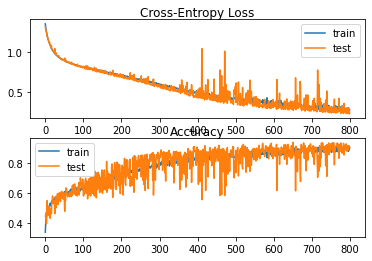

In [4]:
# Parte 2 - Classificação dos sinais do Elevador
import random
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split

# define model
opt = SGD(lr=0.001) # aqui é colocado a taxa de aprendizagem
                     # SGD indica que está usando a técnica de gradiente descendente estocástico para otimizar a MLP
                     # Essa técnica de otimização é a mais usada e é a que se aprende quando se lê sobre redes neurais 
model = Sequential()
model.add(Dense(850, input_dim=850, activation='sigmoid'))  # input_dim é o tamanho da entrada
#model.add(Dense(500, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(4, activation='softmax')) # o número '4' deve ser a quantidade de classes que a rede vai classificar
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# patient early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=120)
# fit model
history = model.fit(trainX, trainy, validation_data=(testX, testy), epochs=400, verbose=1, callbacks=[es], batch_size=10)
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0) #usado para testar a acurácia do modelo
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()

In [9]:
predictions = model.predict(testX)

In [10]:
predictions[0]

In [11]:
testy

In [12]:
testX